### Objectives

1. Download, merge, and describe the dataset and its basic characteristics (e.g., shape,
variable types, basic stats).
2. Choose several variables and create visualizations to show their distributions. Justify
your variable selection.
3. Clean the dataset to handle any missing data and justify your decisions.
4. For building a model, would you rescale any data in this dataset? How and why or
why not?
5. Build a model to identify risk factors for diabetes. Explain your choice of model and
what it can predict. What metrics would you use to assess performance? For this
dataset, how would you know your model is adequate?
6. Using these data, what are some identifiable risk factors for diabetes? How do you
know? Explain as if you were reporting the results to a non-technical stakeholder.

### Code

In [7]:
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
'''

import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [8]:
def get_min_max(df, do_print=True):
    ranges = [
        {"name": col, "min": df[col].min(), "max": df[col].max()} for col in df.columns
    ]

    if do_print:
        print(ranges)

    else:
        return ranges

# 1. 

## 1a. Download

In [9]:
dc = pd.read_csv("dataCategorical.csv")
dn = pd.read_csv("dataNumeric.csv")
do = pd.read_csv("dataOrdinal.csv")

In [10]:
#drop duplicate columns

dc.drop(columns=["DIABETE3.1" ,"MARITAL.1"], inplace=True) # these may not be duplicate variables


In [11]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   _RACE     4997 non-null   float64
 3   MSCODE    3187 non-null   float64
 4   FLUSHOT6  4762 non-null   float64
 5   EMPLOY1   4981 non-null   float64
 6   SEX       5000 non-null   float64
 7   MARITAL   4990 non-null   float64
 8   CVDCRHD4  5000 non-null   float64
 9   HLTHCVR1  3318 non-null   float64
 10  CHCKIDNY  5000 non-null   float64
 11  USEEQUIP  4837 non-null   float64
 12  _TOTINDA  5000 non-null   float64
 13  ADDEPEV2  5000 non-null   float64
 14  RENTHOM1  4898 non-null   float64
 15  EXERANY2  5000 non-null   float64
 16  BLIND     4830 non-null   float64
 17  DECIDE    4829 non-null   float64
 18  HLTHPLN1  5000 non-null   float64
 19  _STATE    5000 non-null   float64
 20  ASTHMA3   5000 non-null   floa

## analsying the frequency of resonponses on Health Care Plan

In [12]:
dc["HLTHPLN1"].value_counts()


1.0    4621
2.0     359
9.0      12
7.0       8
Name: HLTHPLN1, dtype: int64

In [13]:
# retrieving the names of the dc columns

dcColumnsNames = dc.columns.tolist()
dnColumnNames = dn.columns.tolist()
doColumnNames = do.columns.tolist()



Cleaning the Categorical Data


Replacing the NA rows in all  columns with the mean value of the column

In [14]:
''''

dc['MSCODE'].fillna(value =dc['MSCODE'].mean(), inplace =True)
dc['HLTHCVR1'].fillna(value =dc['HLTHCVR1'].mean(), inplace =True)

dc['FLUSHOT6'].fillna(value =dc['FLUSHOT6'].mean(), inplace =True)

dc['_RACE'].fillna(value =dc['_RACE'].mean(), inplace =True)

dc['EMPLOY1'].fillna(value =dc['EMPLOY1'].mean(), inplace =True)
dc['MARITAL'].fillna(value =dc['MARITAL'].mean(), inplace =True)
dc['USEEQUIP'].fillna(value =dc['USEEQUIP'].mean(), inplace =True)
dc['RENTHOM1'].fillna(value =dc['RENTHOM1'].mean(), inplace =True)
dc['BLIND'].fillna(value =dc['BLIND'].mean(), inplace =True)
dc['DECIDE'].fillna(value =dc['DECIDE'].mean(), inplace =True)

'''


# replacing NA with the middle occuring value in each column.
for column in dcColumnsNames:
    dc[column].fillna(value =dc[column].median(), inplace =True)
    
for column in dnColumnNames:
    dn[column].fillna(value =dn[column].median(), inplace =True)
    
for column in doColumnNames:
    do[column].fillna(value =do[column].median(), inplace =True)


    








## 1b. Merge

In [15]:
dc_dn = dc.merge(dn, how="inner")
alldf = dc_dn.merge(do, how="inner")
alldf.set_index("PERSONID", inplace=True) # set the 'PERSONID' variable as Index key
alldf.head(20)

,DIABETE3,_RACE,MSCODE,FLUSHOT6,EMPLOY1,SEX,MARITAL,CVDCRHD4,HLTHCVR1,CHCKIDNY,...,DRVISITS,GENHLTH,_AGEG5YR,_BMI5CAT,CHECKUP1,INCOME2,_EDUCAG,SLEPTIM1,MENTHLTH,_SMOKER3
PERSONID,,,,,,,,,,,,,,,,,,,,,
355467,3.0,2.0,3.0,2.0,1.0,1.0,6.0,2.0,7.0,2.0,...,6.0,1.0,6.0,3.0,3.0,3.0,3.0,6.0,88.0,4.0
117235,3.0,1.0,5.0,1.0,7.0,2.0,3.0,2.0,2.0,2.0,...,2.0,1.0,10.0,3.0,1.0,4.0,2.0,7.0,88.0,4.0
268614,3.0,1.0,1.0,1.0,7.0,2.0,3.0,2.0,3.0,2.0,...,2.0,2.0,12.0,2.0,1.0,3.0,2.0,8.0,2.0,4.0
332821,3.0,4.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,4.0,2.0,3.0,2.0,1.0,8.0,4.0,6.0,15.0,3.0
348522,3.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,...,1.0,2.0,9.0,2.0,2.0,8.0,3.0,7.0,88.0,4.0
369924,3.0,1.0,1.0,2.0,7.0,2.0,3.0,2.0,2.0,2.0,...,4.0,3.0,12.0,2.0,1.0,3.0,3.0,6.0,88.0,4.0
229177,3.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,4.0,1.0,8.0,4.0,2.0,8.0,4.0,8.0,88.0,3.0
264514,3.0,1.0,5.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,...,5.0,2.0,7.0,2.0,1.0,8.0,2.0,7.0,15.0,1.0
98374,3.0,9.0,5.0,2.0,7.0,2.0,1.0,2.0,3.0,2.0,...,2.0,4.0,10.0,3.0,1.0,99.0,4.0,8.0,88.0,4.0


In [16]:
# copy of data without Categorical types to use for correlation
alldf_tmp = alldf.copy()

In [ ]:
cat_columns = list(dc.columns[1:])
cat_columns.extend(
    ["GENHLTH", "_AGEG5YR", "_BMI5CAT", "CHECKUP1", "INCOME2", "_EDUCAG", "_SMOKER3"]
)

'''
not very necessary as floating point could also represent categories and then we could use
columns.value_counts() to get the statistical summary.
'''

'''
for c in cat_columns:
    alldf[c] = pd.Categorical(alldf[c]) 
'''

## 1c. Describe the dataset and its basic characteristics (e.g., shape, variable types, basic stats)

### Original version

In [ ]:
alldf.head()

In [ ]:
alldf.shape

In [3]:
alldf.info()

NameError: name 'alldf' is not defined

In [17]:
alldf.describe()

,DIABETE3,_RACE,MSCODE,FLUSHOT6,EMPLOY1,SEX,MARITAL,CVDCRHD4,HLTHCVR1,CHCKIDNY,...,DRVISITS,GENHLTH,_AGEG5YR,_BMI5CAT,CHECKUP1,INCOME2,_EDUCAG,SLEPTIM1,MENTHLTH,_SMOKER3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.764200,1.981800,2.915600,1.590400,3.921000,1.589200,2.226800,1.984800,3.259200,1.990800,...,12.617600,2.558400,7.8418,2.937000,1.588400,17.854400,2.988200,7.942400,65.437000,3.556200
std,0.715193,2.241088,1.349385,0.713814,2.851453,0.492028,1.658406,0.571519,9.680246,0.435377,...,24.200176,1.108348,3.4858,0.808432,1.256225,29.824505,1.127437,8.228574,35.469943,1.513043
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,5.0000,2.000000,1.000000,5.000000,2.000000,6.000000,30.000000,3.000000
50%,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,4.000000,2.000000,8.0000,3.000000,1.000000,7.000000,3.000000,7.000000,88.000000,4.000000
75%,3.000000,1.000000,3.000000,2.000000,7.000000,2.000000,3.000000,2.000000,3.000000,2.000000,...,6.000000,3.000000,10.0000,4.000000,2.000000,8.000000,4.000000,8.000000,88.000000,4.000000
max,9.000000,9.000000,5.000000,9.000000,9.000000,2.000000,9.000000,9.000000,99.000000,9.000000,...,99.000000,9.000000,14.0000,4.000000,9.000000,99.000000,9.000000,99.000000,99.000000,9.000000


### Cleaned version

#### Clean dataset

1. Drop NA/missing/refused/do not know/not sure values

In [18]:
def drop_missing(df, print_col=None):
    """
    drop BLANK/missing/refused/don't know/not sure values - inferred from the variable dictionary - from each column
    """
    drop_vals = {
        # "PERSONID": [],
        #"DIABETE3": [7, 9],
        "_RACE": [9],
        # "MSCODE": [],
        "EMPLOY1": [9],
        # "SEX": [],
        "MARITAL": [9],
        "RENTHOM1": [7, 9],
        # "_STATE": [],
        # "NUMADULT": [],
        "CHILDREN": [99],
        "INCOME2": [77, 99],
        "_EDUCAG": [9],
        "WEIGHT2": [7777, 9999],
        "FLUSHOT6": [7, 9],
        "CVDCRHD4": [7, 9],
        "HLTHCVR1": [77, 99],
        "CHCKIDNY": [7, 9],
        "USEEQUIP": [7, 9],
        "_TOTINDA": [9],
        "ADDEPEV2": [7, 9],
        "EXERANY2": [7, 9],
        "BLIND": [7, 9],
        "DECIDE": [7, 9],
        "HLTHPLN1": [7, 9],
        "ASTHMA3": [7, 9],
        "DRVISITS": [77],
        "GENHLTH": [7, 9],
        "_AGEG5YR": [14],
        # "_BMI5CAT": [],
        "CHECKUP1": [7, 9],
        "SLEPTIM1": [77, 99],
        "MENTHLTH": [77, 99],
        "_SMOKER3": [9],
    }

    for col, v in drop_vals.items():
        df = df[~df[col].isin(v)]
        if print_col:
            print(
                f"\n\ncol = {col}-------\ndf[{print_col}].value_counts():\n{df[print_col].value_counts()}"
            )

   #  df.dropna(inplace=True)  NAs has already been handled by replacement with median of each column.
    df.reset_index(drop=True, inplace=True)

    return df

**NOTE:** HLTHPLN1 becomes NaN in corr() because I'm dropping rows with "missing"/"refused"/"do not know" values. Perhaps there's a better way to address these types of values than just deleting the full row?

In [19]:
# alldf_tmp = drop_missing(alldf_tmp, print_col="HLTHPLN1")

alldf = drop_missing(alldf)

2. Make WEIGHT2 as one metric
   1. Arbitrarily chose pounds
   2. 1 kg = 2.2 lbs
   3. 9000 - 9998 is kg without first 9. Ex: 9139 = 139kg

In [20]:
'''
alldf_.loc[alldf_tmp["WEIGHT2"] > 999, "WEIGHT2"] -= 9000 #get kg
alldf_tmp.loc[alldf_tmp["WEIGHT2"] > 999, "WEIGHT2"] /= 2.2 #kg -> lbs

'''
alldf.loc[alldf["WEIGHT2"] > 999, "WEIGHT2"] -= 9000 #get kg
alldf.loc[alldf["WEIGHT2"] > 999, "WEIGHT2"] /= 2.2 #kg -> lbs

1. Reduce DIABETE3 to 0 = negative diagnosis 1 = positive diagnosis as nuances don't matter, only whether someone has a positive/negative diagnosis
   1. 1 and 2 = Yes, 3 and 4 = No

In [21]:
# very good modification of responses

#alldf["DIABETE3"] = np.where(alldf["DIABETE3"] < 3, 1,0)
alldf["DIABETE3"] = np.where(alldf["DIABETE3"] >=3, 0,1)
print(alldf[['DIABETE3']])

      DIABETE3
0            0
1            0
2            0
3            0
4            0
...        ...
3643         0
3644         0
3645         0
3646         0
3647         0

[3648 rows x 1 columns]


4. Turn MENTHLTH, DRVISITS, CHILDREN value 88 to 0
   1. 88 means "None" for these columns

In [22]:
for col in ["MENTHLTH", "DRVISITS", "CHILDREN"]:
    alldf[col].replace({88: 0}, inplace=True) # this is good.

In [23]:
alldf["DIABETE3"].value_counts() # shows 3648 where initially told they have diabete3


0    3185
1     463
Name: DIABETE3, dtype: int64

### new dataset shape, variable types, and basic stats

alldf_new = alldf.copy()

for c in cat_columns:
    alldf_new[c] = pd.Categorical(alldf_new[c])

In [24]:
alldf_new= alldf.copy()
alldf_new.shape

(3648, 33)

In [ ]:
alldf_new.info()

In [ ]:
alldf_new.describe()



In [25]:
alldf_new.corr()


,DIABETE3,_RACE,MSCODE,FLUSHOT6,EMPLOY1,SEX,MARITAL,CVDCRHD4,HLTHCVR1,CHCKIDNY,...,DRVISITS,GENHLTH,_AGEG5YR,_BMI5CAT,CHECKUP1,INCOME2,_EDUCAG,SLEPTIM1,MENTHLTH,_SMOKER3
DIABETE3,1.000000,0.041284,-0.001136,-0.065834,0.206484,-0.002651,-0.003851,-0.177345,0.097869,-0.140910,...,0.087882,0.271065,0.203310,0.192126,-0.116959,-0.109187,-0.076139,0.005108,0.038853,0.000575
_RACE,0.041284,1.000000,-0.041338,0.099391,-0.032729,0.030366,0.145637,0.015390,0.078145,-0.011761,...,-0.034167,0.108403,-0.178911,0.027972,0.055437,-0.221331,-0.170091,-0.067171,0.087816,0.003762
MSCODE,-0.001136,-0.041338,1.000000,0.065510,-0.015193,0.012462,-0.036725,0.012930,0.009260,0.002076,...,-0.048518,0.034150,-0.016645,0.040195,0.031890,-0.074533,-0.104191,-0.000464,0.010879,-0.025138
FLUSHOT6,-0.065834,0.099391,0.065510,1.000000,-0.135334,-0.055092,0.085690,0.052261,-0.028368,0.048428,...,-0.093990,-0.029441,-0.228402,-0.033960,0.196972,-0.080351,-0.091783,-0.064381,0.057271,-0.099866
EMPLOY1,0.206484,-0.032729,-0.015193,-0.135334,1.000000,0.081342,-0.003280,-0.169819,0.352928,-0.138623,...,0.129699,0.309064,0.530909,0.046692,-0.142045,-0.336339,-0.183267,0.067158,0.081692,-0.048701
SEX,-0.002651,0.030366,0.012462,-0.055092,0.081342,1.000000,0.021061,0.037592,0.029234,0.008114,...,0.078600,0.005983,0.028168,-0.108211,-0.078651,-0.127647,-0.037182,0.015041,0.072185,0.049968
MARITAL,-0.003851,0.145637,-0.036725,0.085690,-0.003280,0.021061,1.000000,0.008398,0.112215,-0.007356,...,0.033715,0.063301,-0.208850,-0.033955,0.095521,-0.327489,-0.109703,-0.062603,0.088383,-0.069436
CVDCRHD4,-0.177345,0.015390,0.012930,0.052261,-0.169819,0.037592,0.008398,1.000000,-0.073971,0.108548,...,-0.076097,-0.220392,-0.187457,-0.051788,0.064173,0.081282,0.054242,0.006100,-0.049552,0.026675
HLTHCVR1,0.097869,0.078145,0.009260,-0.028368,0.352928,0.029234,0.112215,-0.073971,1.000000,-0.072270,...,0.084818,0.199136,0.218351,0.023432,-0.031193,-0.323532,-0.161679,0.016614,0.094933,-0.075218
CHCKIDNY,-0.140910,-0.011761,0.002076,0.048428,-0.138623,0.008114,-0.007356,0.108548,-0.072270,1.000000,...,-0.074173,-0.192510,-0.087681,-0.063476,0.021517,0.088566,0.024201,0.024203,-0.063168,0.017997



 # for heatmap
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(alldf_new.corr(), annot =True)
plt.show()

# 2.

## Basic Distribution Visualizations

### 2a. Choose several variables

In [26]:
variables = alldf_new.columns

### 2b Create visualizations to show their distributions.

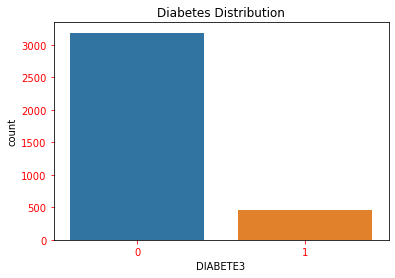

In [27]:
# make target variable distribution

ax =sns.countplot(x="DIABETE3", data=alldf_new)
plt.title("Diabetes Distribution")
ax.tick_params(axis='x', colors='red')  # Change x-axis label color to red
ax.tick_params(axis='y', colors='red')  # Change y-axis label color to red


# it's an imbalanced distribution

7.0     1149
8.0     1055
6.0      806
5.0      231
9.0      172
4.0      101
10.0      73
12.0      23
3.0       16
2.0        8
11.0       6
13.0       2
15.0       2
18.0       1
14.0       1
1.0        1
16.0       1
Name: SLEPTIM1, dtype: int64


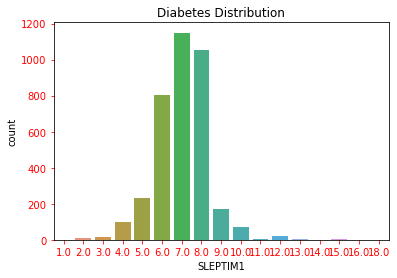

In [28]:
ax =sns.countplot(x="SLEPTIM1", data=alldf_new)
ax.tick_params(axis='x', colors='red')  # Change x-axis label color to red
ax.tick_params(axis='y', colors='red')  # Change y-axis label color to red

plt.title("Diabetes Distribution")

print(alldf_new['SLEPTIM1'].value_counts())


In [29]:
custom_plots = {
    "_RACE": {
        "labels": {
            1: "White",
            2: "Black",
            3: "Am. Indian",
            4: "Asian",
            5: "Pacific",
            6: "Other",
            7: "Multiracial",
            8: "Hispanic",
            9: "Not Sure",
        },
        "figsize": None,
    },
    "SEX": {"labels": {1: "Male", 2: "Female"}, "figsize": None},
    "_STATE": {"labels": None, "figsize": (12, 5)},
    "DRVISITS": {"labels": None, "figsize": (12, 5)},
}

In [30]:

def graph(variable, df=alldf_new, figsize=None, labels=None, plot_type='bar', title=None, colors=None):
    
    
    # this is to enhance the function for clarity of usage.
    if df.empty or variable not in df.columns:
        raise ValueError("DataFrame is empty or specified variable not found in DataFrame.")

    var_df = df.copy()

    if labels:
        var_df[variable] = df[variable].replace(labels)

    grouped_data = var_df.groupby(variable)["DIABETE3"].value_counts(normalize=True).unstack()

    # Plotting
    if not figsize:
        figsize = (8, 6)  # Default figsize

    if not title:
        title = f"Diabetes Distribution over {variable}"

    if not colors:
        colors = ['skyblue','yellow']  # Default color

    ax = grouped_data.plot(kind=plot_type, figsize=figsize, title=title, color=colors)

    return ax


In [ ]:
for v in variables:
    if v in custom_plots:
        graph(
            v,
            figsize=custom_plots[v].get("figsize"),
            labels=custom_plots[v].get("labels"),
        )
    else:
        graph(v)

## 2c. Justify your variable selection

Don't necessarily know how to do this part yet at this point. I just chose all the variables. Is there another way I should answer this question and choose my variables?

## Population Analysis

#### Notes

**Correlation:**

- If a correlation value is negative or very low, it indicates a weak relationship with DIABETE3. For example, _RACE has a negative value, suggesting a weak relationship, so consider dropping _RACE as a variable. However, later on, it's observed that all independent variables have a weak relationship to the target, so it's wiser to instead observe relationships to DIABETE3 with combined features.

- A negative relationship implies an inverse correlation, while a positive relationship means that as one variable increases, the other also increases. If there's no relationship, there isn't a set rule for what happens to the other variable.

- The range of the correlation coefficient (\(r\)) is -1 to 1, where:
  - \(r = 1\): Perfect positive relationship
  - \(0.5 < r < 1\): Strong positive relationship
  - \(0 < r \leq 0.5\): Weak positive relationship
  - \(-0.5 \leq r < 0\): Weak negative relationship
  - \(-1 < r < -0.5\): Strong negative relationship
  - \(r = -1\): Perfect negative relationship
  - \(r = 0\): No relationship

- A variable can **only** have a perfect relationship to another variable if compared to itself.

- When using `corr()`, all variables need to be the same length. It cannot work on categorical and numeric types simultaneously. Therefore, run `corr()` when all features are of the same type.

*Refer to the correlation formula for a detailed understanding.*

**Population Analysis:**

- The dataset has a relatively small number of variables compared to the number of entries.

- Overfitting occurs when there are few variables and many entries, leading the model to capture noise instead of true patterns. Underfitting is the opposite, where the model is too simple to capture the underlying patterns.

- Conduct population analysis to identify variables with weak relationships to the target variable (DIABETE3). In a large dataset, it's acceptable to drop these variables to reduce bias and improve model performance.

- Building the model with only the most significant variables helps prevent overfitting and enhances the model's generalizability.


#### Correlation Diagrams

In [31]:
# Assuming 'df' is your DataFrame and 'target_variable' is the variable you want to compare correlations with
target_variables= 'DIABETE3'

# Calculate correlations with the target variable
correlations = alldf_new.corr()[target_variables]

# Select variables where the correlation is greater than 0.2 or less than -0.1
goodPositive_Selected_variables = correlations[(correlations > 0.2) ].index.tolist()
print(f"{goodPositive_Selected_variables}\n {len(goodPositive_Selected_variables)}") # these are good variables to use.

goodNegative_Selected_Variables = correlations[(correlations <-0.1) ].index.tolist()
print(f"{goodNegative_Selected_Variables}\n {len(goodNegative_Selected_Variables)}") # these are good variables to use.


goodNegative_Selected_Variables.extend(goodPositive_Selected_variables)
goodNegative_Selected_Variables

desiredVars =goodNegative_Selected_Variables
desiredVars # variables of interest is now contained herein


['DIABETE3', 'EMPLOY1', 'GENHLTH', '_AGEG5YR']
 4
['CVDCRHD4', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'CHILDREN', 'CHECKUP1', 'INCOME2']
 7


['CVDCRHD4',
 'CHCKIDNY',
 'USEEQUIP',
 'ADDEPEV2',
 'CHILDREN',
 'CHECKUP1',
 'INCOME2',
 'DIABETE3',
 'EMPLOY1',
 'GENHLTH',
 '_AGEG5YR']

1.EMPLOY1: Employment status can instigate diabete3 eg: a person without any source of income can be worried, consequently have HBB which may lead to diabete3

2.GENHLTH: Awareness of a person's general status can boost health confidence thereby eliminating health worries which may lead to HBB/diabete3.

3. _AGEG5YR: A person's age is a factor for being diabetic 
All the above are positive relationship which means, increase in one leads leads to increase in the other though not in a consistent basis as the relationship is not strong.

1. CVDCRHD4: History of coronary heart disease could also contribute to a person being diabetic.
2. CHCKIDNY:  History of kidney disease could also contribute to a person being diabetic.
3.'USEEQUIP: Health condition that makes a person use special equipment could make the person diabetic

4. ADDEPEV2: Depressive conditions could make a person diabetic

5. 'CHILDREN: The number of children a partent have may be factor for diabete3

6.CHECKUP1: Medical checkup intervals could also be used to study diabete3.

7. INCOME2: A person's income status/level may explain diabete3.

Note: All the above factors cannot independently explain diabete3 . However, they have understood relationship with diabete3.






plt.figure(figsize=(35, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, linewidths=0.1)
plt.show()

corr["DIABETE3"]

**Observations**

The independent variables exhibit a modest association with diabetes, as indicated by correlation coefficients (r) falling within the range of -.5<=r<0 or 0<r<=0.5. Consequently, it becomes essential to evaluate the collective relationships among the features of the independent variables in connection to diabetes. None of the variables independently can explain the target variable

#### Feature Engineering  
creating new features from highly correlated features

In [32]:
cor = alldf_new.corr()
def get_correlated_features(feature="DIABETE3",corr = cor):
    """
    Given a feature name, get the features with a strong and weak or negligible correlation to it.
    """

    correlation_dict = corr[feature]
    weak_dict, strong_dict = {}, {}

    for f, r in correlation_dict.items():
     #   if -0.5 <= r <= 0.5: # the left tail of this condition is not correct by logic.
        if -0.5<=r <=0.5: # this is what you intend to do.
            weak_dict[f] = r
        elif -1 <= r < 1: # no nan or 1 vals. This is very correct
            strong_dict[f] = r

    weak = sorted(weak_dict.items(), key=lambda x: x[1])
    strong = sorted(strong_dict.items(), key=lambda x: x[1], reverse=True)

    return weak, strong




In [33]:
strong_correlations = []

for col in alldf_new.columns:
    _, strong = get_correlated_features(col)

    strong_correlations.extend([(col, f, v) for f, v in strong])

strong_correlations 
''' good exploration. But note that the study is tailored to the correlation of  target
variable with every other variables.
'''
strong_correlations 


[('EMPLOY1', '_AGEG5YR', 0.5309092868535303),
 ('WEIGHT2', '_BMI5CAT', 0.7446543973565117),
 ('_AGEG5YR', 'EMPLOY1', 0.5309092868535303),
 ('_BMI5CAT', 'WEIGHT2', 0.7446543973565117)]

I derived that the strongest correlations are between the following:
- EMPLOY1 and AGEG5YR have a strong positive correlation where r = 0.556
- CHILDREN and _AGEG5YR have a strong negative correlation where r = -0.526.
- WEIGHT2 and _BMI5CAT have a strong positive correlation where r = 0.751. 

**Therefore, these are the variables I choose along with the target variable, DIABETE3.**

sns.countplot is great for plotting two categorical variables. 
- If dodge is set to True, the bars corresponding to different categories of the hue variable will be plotted adjacent to each other. 
- Example: the graph below for age vs employment, the bars for each color within an age group show the count of individuals with that specific employment status in that age group.

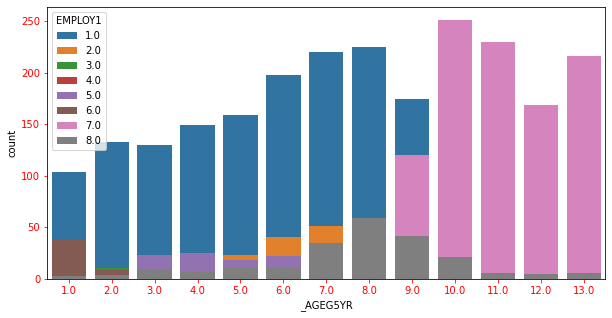

In [34]:
# 0.555511 (strong positive correlation)

plt.figure(figsize=(10, 5))
ax =sns.countplot(x="_AGEG5YR", hue="EMPLOY1", data=alldf_new, dodge=False)
ax.tick_params(axis='x', colors='red')  # Change x-axis label color to red
ax.tick_params(axis='y', colors='red')  # Change y-axis label color to red

# sns.set(rc={'xtick.color':'red', 'ytick.color':'red'})

plt.show()


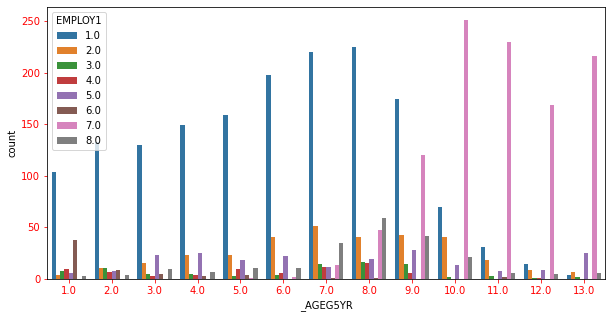

In [35]:
# 0.555511 (strong positive correlation)
 # see if you can interpret this one better than the doged chart above.
plt.figure(figsize=(10, 5))
ax =sns.countplot(x="_AGEG5YR", hue="EMPLOY1", data=alldf_new, dodge=True)
ax.tick_params(axis='x', colors='red')  # Change x-axis label color to red
ax.tick_params(axis='y', colors='red')  # Change y-axis label color to red

# sns.set(rc={'xtick.color':'red', 'ytick.color':'red'})

plt.show()


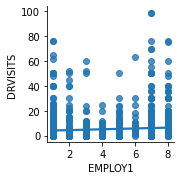

In [36]:
# -0.053873 (weak negative correlation)
sns.pairplot(alldf_new, x_vars="EMPLOY1", y_vars="DRVISITS", kind ='reg')

# 3

## 3a. Clean the dataset to handle any missing data

Look at part 1

## 3b. Justify your decisions

I wanted to drop all NA values because those represented BLANK, which corresponds with missing values. Additionally, I decided to get rid of values that correspond to "refused" and "do not know/not sure" because I felt that simplifying the dataset to only include entries where respondents gave clear answers was important for training my model.

# 4

##### 4a. For building a model, would you rescale any data in this dataset? **How** and **why or why not**?

If I were using k-nearest neighbors (knn), gradient descent-based algorithms, principal component analysis, or regularization techniques I would rescale since those models/algorithms are sensitive to feature scales. For instance, distance-based algorithms like knn rely on the distance between data points, so a major difference in scale can lead to greater distances which can dominate distance calculations. So rescaling some features could improve convergence and diminish bias amongst features. The way I would rescale is by standardizing or normalizing the data for features with a major range such as WEIGHT2 since pounds can go from 50-999 and similarly kilograms 9000-9998.

However, I wouldn't need to rescale if I use a tree-based model such as decision trees, random forests, or gradient boosting methods since they're typically insensitive to features' scales. For example, decision trees rely on feature thresholds, which is impartial to the scale of those features.

In my case, I chose to use XGBoosting and also tried regular Gradient Boosting, particularly the classification model version. Therefore, I don't need to rescale as mentioned prior. 

Nonetheless, I will still address the imbalanced nature of my dataset regardless of the model used since I want to mitigate bias to the majority class. I learned by graphing the diabetes distribution there's an overwhelming number of people without diabetes to those with. To resolve this imbalance, I can perform random or synthetic oversampling methods.

Furthermore, for the WEIGHT2 feature, unifying the units to a single metric, such as pounds will help because the model won't recognize the difference between pounds and kilograms. For the target variable DIABETE3, adopting a binary representation where 1 indicates a positive diagnosis of diabetes and 0 signifies the absence of a diabetes diagnosis aligns with my goal of binary classification in the modeling process.

# 5

## 5a Build a model to identify risk factors for diabetes. 

## 5b Explain your choice of model and what it can predict. 

## 5c What metrics would you use to assess performance? 

## 5d For this dataset, how would you know your model is adequate?

!pip show category_encoders # to check if the package exist or not
!pip show xgboost


In [37]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

estimators =[('encoder', TargetEncoder()),('clf', XGBClassifier(random_state =8))
            ]
pipe =Pipeline(steps =estimators)
pipe


'''
# Load dataset
from sklearn.datasets import load_boston
f
boston = load_boston()
data = boston.data
target = boston.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Create XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predict on test data
preds = xg_reg.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, preds, squared=False)
print("RMSE:", rmse)

'''


'\n# Load dataset\nfrom sklearn.datasets import load_boston\nf\nboston = load_boston()\ndata = boston.data\ntarget = boston.target\n\n# Split data into train and test sets\nX_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)\n\n# Create XGBoost regressor\nxg_reg = xgb.XGBRegressor(objective =\'reg:squarederror\', colsample_bytree = 0.3, learning_rate = 0.1,\n                max_depth = 5, alpha = 10, n_estimators = 10)\n\n# Fit the model\nxg_reg.fit(X_train, y_train)\n\n# Predict on test data\npreds = xg_reg.predict(X_test)\n\n# Evaluate the model\nrmse = mean_squared_error(y_test, preds, squared=False)\nprint("RMSE:", rmse)\n\n'

# separate target and independent variables
y_resample= alldf_tmp["DIABETE3"] 
X_resample = alldf_tmp.drop(columns="DIABETE3") 
alldf_tmp.info()

y= alldf_new['DIABETE3']
X = alldf_new.drop(columns = 'DIABETE3')


SMOTE (Synthetic Minority Over-sampling Technique) from the imbalanced-learn library to address class imbalance in a dataset. SMOTE is commonly used for oversampling the minority class to balance class distribution in classification tasks

In [42]:
alldf_tmp["DIABETE3"].astype('category')

PERSONID
355467    3.0
117235    3.0
268614    3.0
332821    3.0
348522    3.0
         ... 
447307    3.0
401134    3.0
227725    3.0
394805    3.0
168122    3.0
Name: DIABETE3, Length: 5000, dtype: category
Categories (6, float64): [1.0, 2.0, 3.0, 4.0, 7.0, 9.0]

### This is where I have the challenge please

In [44]:
# address imbalance in the dataset

y_resample = alldf_new["DIABETE3"]
X_resample= alldf_new.drop(columns = "DIABETE3")

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resample, y_resample = smote.fit_resample(X_resample, y_resample)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate example data (you may have your own dataset)
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Split the data into train and test sets (you may already have your train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only on the training data to avoid data leakage
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, continue with your machine learning workflow using X_train_resampled and y_train_resampled
# (e.g., train your model on the resampled data)


In [5]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

model = XGBClassifier()

# cross validation version
kf = KFold(n_splits=5)
avg_model_scores = np.mean(cross_val_score(model, X, y, cv=kf))
print(avg_model_scores)

NameError: name 'X' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
feature_importances = model.feature_importances_
for feature, importance in sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True):
  print(f"{feature}: {importance}")

# 6. Using these data, what are some identifiable risk factors for diabetes? How do you know? Explain as if you were reporting the results to a non-technical stakeholder.

The most important features are 

GENHLTH: 0.16922499239444733
_TOTINDA: 0.07415896654129028
CHILDREN: 0.07380124181509018
_BMI5CAT: 0.07154451310634613
BLIND: 0.05338083207607269
CVDCRHD4: 0.050223458558321

The least important are:

WEIGHT2: 0.010020529851317406
PERSONID: 0.00973158422857523
MARITAL: 0.009483946487307549
_STATE: 0.008029725402593613
EXERANY2: 0.0
HLTHPLN1: 0.0